
# Gráficos

Metamos los gráficos que necesitamos en esta notebook

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import contrastes
import seaborn as sns


# Gráficos distribución cruda


In [3]:

df_all = contrastes.read_occurrence_dataframe("output/provinces_words.csv", filter_words=False)

/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_palabras = cant_palabras
/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:148: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_personas = cant_personas


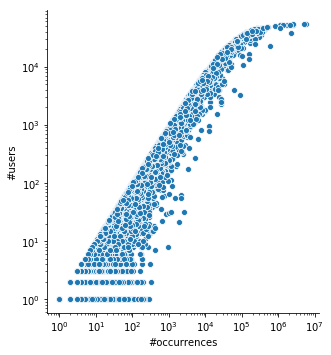

In [14]:
df_tiny = df_all.sample(frac=0.15)

g = sns.relplot(x="cant_palabra", y="cant_usuarios", data=df_tiny)

g.ax.loglog()

g.ax.set_xlabel("#occurrences")
g.ax.set_ylabel('#users');


In [15]:
g.savefig("../output/figures/relplot_users_occurrences.png")

# Gráficos de entropía

Empecemos con distplots de la entropía

In [16]:

df = contrastes.read_occurrence_dataframe("output/provinces_words.csv", filter_words=True)

/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_palabras = cant_palabras
/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:148: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_personas = cant_personas


In [17]:
from scipy.stats import entropy

df["entropia_usuarios"] = df[df.cant_personas].apply(entropy, axis=1, raw=True)
df["entropia_palabras"] = df[df.cant_palabras].apply(entropy, axis=1, raw=True)

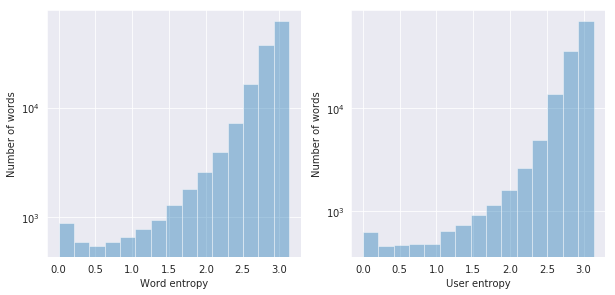

In [58]:
plt.rcParams["figure.figsize"] = (10,10)

sns.set_style("dark")

fig = plt.figure()
plt.subplot(2, 2, 1)

g = sns.distplot(df["entropia_palabras"], bins=15, kde=False)
g.semilogy()
g.set_xlabel("Word entropy")
g.set_ylabel("Number of words")
g.grid(True)

plt.subplot(2, 2, 2)
g = sns.distplot(df["entropia_usuarios"], bins=15, kde=False)
g.semilogy()
g.set_xlabel("User entropy")
g.set_ylabel("Number of words")
g.grid(True)



In [60]:
fig.savefig("../output/figures/entropies.png", bbox_inches='tight')